<a href="https://colab.research.google.com/github/Mintu-Vipin/Semester3/blob/master/MintuVipinJoy_COMP258Lab2_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading cifar10 dataset and split into Training, Testing, validating data 
(train_full_images, train_full_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print("Shape of train_full_images",train_full_images.shape)

val_images, train_images = train_full_images[:5000], train_full_images[5000:]
val_labels, train_labels = train_full_labels[:5000], train_full_labels[5000:]

# Normalize pixel values to be between 0 and 1
train_images, test_images, val_images = train_images / 255.0, test_images / 255.0, val_images/255.0
# train_images.shape
# train_labels.shape

170508288/170498071 [==============================] - 4s 0us/step
Shape of train_full_images (50000, 32, 32, 3)


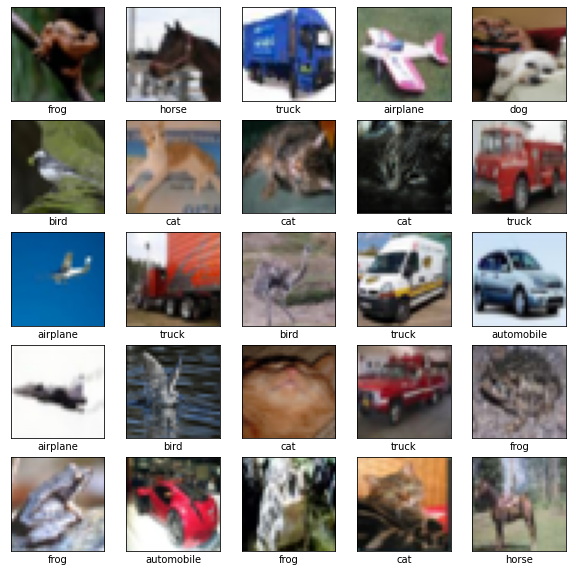

In [4]:
# Plot the images in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
#Creating the model based on the net architecture. We will use Keras sequential API to create the model
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# add the first hidden layer with 300 neurons, relu  activation function
model.add(keras.layers.Dense(300, activation="relu"))
# add the first hidden layer with 100 neurons, relu  activation function
model.add(keras.layers.Dense(100, activation="relu"))
# add the output layer with 10 neurons, softmax activation function
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [7]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense_1') is hidden1

dense


False

In [8]:
weights, biases = hidden1.get_weights()
print(weights)
print(biases)

[[ 0.02910774  0.00150276  0.01524736 ...  0.00693499  0.03262772
   0.00726086]
 [-0.03369342 -0.03073986 -0.03090671 ...  0.0376733  -0.00029659
  -0.00585593]
 [ 0.02630236  0.01974773 -0.03597569 ... -0.02010252  0.02152942
  -0.02009556]
 ...
 [-0.0400796   0.02422918  0.02308895 ...  0.04208278 -0.01890464
   0.01084626]
 [-0.01375652 -0.01535786  0.03486827 ...  0.0185178   0.01489193
  -0.00241375]
 [ 0.03596564  0.0042862   0.00561304 ... -0.00314353  0.02526263
   0.01943952]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [9]:
print(weights.shape)
print(biases.shape)

(3072, 300)
(300,)


In [10]:
# Compiling the model (this will require choosing a loos function, optimizer, and metric)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [11]:
# Fitting the model (this will require to specify training set, epochs)
history = model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

Epoch 1/30
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8936 - accuracy: 0.3228 - val_loss: 1.9884 - val_accuracy: 0.3162
Epoch 2/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7076 - accuracy: 0.3926 - val_loss: 1.7463 - val_accuracy: 0.3774
Epoch 3/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6248 - accuracy: 0.4258 - val_loss: 1.6089 - val_accuracy: 0.4270
Epoch 4/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5684 - accuracy: 0.4464 - val_loss: 1.7951 - val_accuracy: 0.3640
Epoch 5/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5245 - accuracy: 0.4615 - val_loss: 1.6468 - val_accuracy: 0.4102
Epoch 6/30
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4852 - accuracy: 0.4751 - val_loss: 1.5630 - val_accuracy: 0.4406
Epoch 7/30
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4537 - accuracy: 0.4863 - val_loss: 1.5099 - val_ac

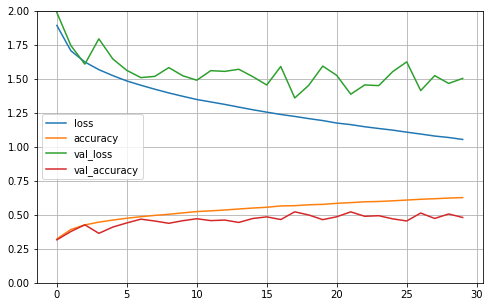

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-2]
plt.show()

In [13]:
# Evaluating the model on testing set.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 1.5070 - accuracy: 0.4836


[1.5070215463638306, 0.483599990606308]

## **Model_1**

In [14]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_1.add(keras.layers.Dense(400, activation="selu"))
model_1.add(keras.layers.Dense(300, activation="selu"))
model_1.add(keras.layers.Dense(100, activation="selu"))
model_1.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               1229200   
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 1,380,610
Trainable params: 1,380,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adamax",
              metrics=["accuracy"])


In [26]:
history = model_1.fit(train_images, train_labels, epochs=30, batch_size=30 ,validation_data=(val_images, val_labels))

Epoch 1/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.6414 - accuracy: 0.7736 - val_loss: 1.6258 - val_accuracy: 0.5200
Epoch 2/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.6188 - accuracy: 0.7808 - val_loss: 1.7438 - val_accuracy: 0.5298
Epoch 3/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.5940 - accuracy: 0.7878 - val_loss: 1.7528 - val_accuracy: 0.5390
Epoch 4/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.5719 - accuracy: 0.7960 - val_loss: 1.7247 - val_accuracy: 0.5332
Epoch 5/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.5467 - accuracy: 0.8045 - val_loss: 1.8025 - val_accuracy: 0.5308
Epoch 6/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.5259 - accuracy: 0.8114 - val_loss: 1.9175 - val_accuracy: 0.5348
Epoch 7/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.5026 - accuracy: 0.8224 - val_loss: 1.9006 -

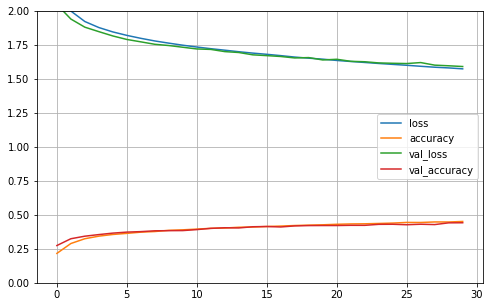

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [37]:
model_1.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 2.9974 - accuracy: 0.5374


[2.9974215030670166, 0.5374000072479248]

## **Model_2**

In [38]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_2.add(keras.layers.Dense(600, activation="selu"))
model_2.add(keras.layers.Dense(400, activation="selu"))
model_2.add(keras.layers.Dense(300, activation="selu"))
model_2.add(keras.layers.Dense(100, activation="selu"))
model_2.add(keras.layers.Dense(10, activation="softmax"))

In [39]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 600)               1843800   
_________________________________________________________________
dense_18 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_19 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 2,235,610
Trainable params: 2,235,610
Non-trainable params: 0
____________________________________________

In [40]:
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [27]:
history = model_2.fit(train_images, train_labels, epochs=30, batch_size=40 ,validation_data=(val_images, val_labels))

Epoch 1/30
1125/1125 [==============================] - 39s 35ms/step - loss: 1.4278 - accuracy: 0.4974 - val_loss: 1.6983 - val_accuracy: 0.4648
Epoch 2/30
1125/1125 [==============================] - 39s 34ms/step - loss: 1.4094 - accuracy: 0.5040 - val_loss: 1.8307 - val_accuracy: 0.4752
Epoch 3/30
1125/1125 [==============================] - 38s 34ms/step - loss: 1.4136 - accuracy: 0.5112 - val_loss: 1.4998 - val_accuracy: 0.4728
Epoch 4/30
1125/1125 [==============================] - 41s 36ms/step - loss: 1.3818 - accuracy: 0.5170 - val_loss: 1.5937 - val_accuracy: 0.4756
Epoch 5/30
1125/1125 [==============================] - 40s 35ms/step - loss: 1.3617 - accuracy: 0.5182 - val_loss: 1.6091 - val_accuracy: 0.4722
Epoch 6/30
1125/1125 [==============================] - 40s 35ms/step - loss: 1.3540 - accuracy: 0.5253 - val_loss: 1.5626 - val_accuracy: 0.4782
Epoch 7/30
1125/1125 [==============================] - 39s 35ms/step - loss: 1.3358 - accuracy: 0.5305 - val_loss: 1.6445 -

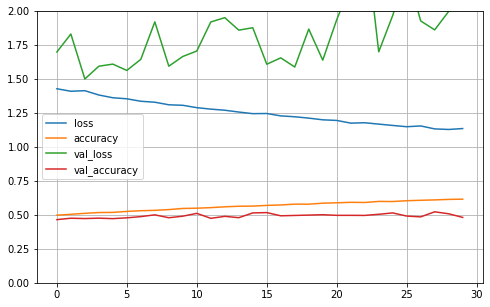

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [29]:
model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 2.0863 - accuracy: 0.4741


[2.0863189697265625, 0.4740999937057495]

## **Model_3**

In [30]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model_3.add(keras.layers.Dense(600, activation="LeakyReLU"))
model_3.add(keras.layers.Dense(400, activation="LeakyReLU"))
model_3.add(keras.layers.Dense(300, activation="LeakyReLU"))
model_3.add(keras.layers.Dense(100, activation="LeakyReLU"))
model_3.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 600)               1843800   
_________________________________________________________________
dense_13 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_14 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 2,235,610
Trainable params: 2,235,610
Non-trainable params: 0
____________________________________________

In [32]:
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])


In [33]:
history = model_3.fit(train_images, train_labels, epochs=30, batch_size=200 ,validation_data=(val_images, val_labels))

Epoch 1/30
225/225 [==============================] - 13s 56ms/step - loss: 2.1696 - accuracy: 0.2164 - val_loss: 2.0478 - val_accuracy: 0.2742
Epoch 2/30
225/225 [==============================] - 12s 56ms/step - loss: 1.9997 - accuracy: 0.2891 - val_loss: 1.9409 - val_accuracy: 0.3242
Epoch 3/30
225/225 [==============================] - 13s 56ms/step - loss: 1.9225 - accuracy: 0.3243 - val_loss: 1.8809 - val_accuracy: 0.3430
Epoch 4/30
225/225 [==============================] - 13s 56ms/step - loss: 1.8783 - accuracy: 0.3432 - val_loss: 1.8481 - val_accuracy: 0.3548
Epoch 5/30
225/225 [==============================] - 12s 55ms/step - loss: 1.8460 - accuracy: 0.3556 - val_loss: 1.8164 - val_accuracy: 0.3656
Epoch 6/30
225/225 [==============================] - 12s 55ms/step - loss: 1.8206 - accuracy: 0.3636 - val_loss: 1.7906 - val_accuracy: 0.3730
Epoch 7/30
225/225 [==============================] - 12s 55ms/step - loss: 1.7989 - accuracy: 0.3726 - val_loss: 1.7730 - val_accuracy:

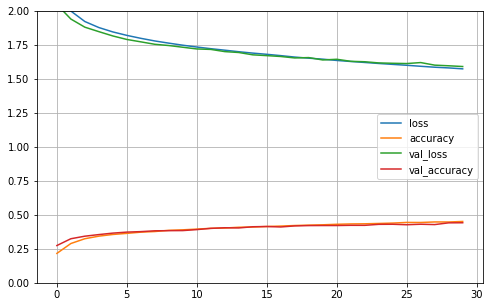

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [35]:
model_3.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 1.5930 - accuracy: 0.4425


[1.5929681062698364, 0.4424999952316284]

## **Prediction**

In [41]:
# y_pred = (model.predict(X_new)> 0.5).astype("int32")
y_pred = np.argmax(model_1.predict(X_new), axis=-1)
y_pred


array([3, 8, 0])

In [42]:
import numpy as np
np.array(class_names)[y_pred]

array(['cat', 'ship', 'airplane'], dtype='<U10')

In [43]:
y_new = test_labels[:3]
y_new

array([[3],
       [8],
       [8]], dtype=uint8)

In [ ]:
# train_images=train_images.astype('float32')
# test_images = test_images.astype('float32')
# train_labels=train_labels.astype('float32')
# test_labels = test_labels.astype('float32')
# val_images=val_images.astype('float32')
# val_labels=val_labels.astype('float32')
# train_images = np.asarray(train_images).astype('float32').reshape((-1,1))
# train_labels = np.asarray(train_labels).astype('float32').reshape((-1, 1))
# train_images.shape
# train_labels.shape

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
# from time import time
# from sklearn.model_selection import RandomizedSearchCV

# def create_model(optimizer='rmsprop', init='glorot_uniform'):
#     model = keras.models.Sequential()
#     model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
#     model.add(keras.layers.Dense(400, activation="relu"))
#     model.add(keras.layers.Dense(300, activation="relu"))
#     model.add(keras.layers.Dense(100, activation="relu"))
#     model.add(keras.layers.Dense(30, activation="softmax"))
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
#     return model

# start= time()
# model = KerasClassifier(build_fn=create_model,verbose=1)
# n_iter_search = 16 # Number of parameter settings that are sampled.
# optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
# epochs = np.array([50, 100, 150])
# batches = np.array([5, 10, 20])
# param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)

# random_search = RandomizedSearchCV(estimator=model, 
#                                    param_distributions=param_grid,
#                                    n_iter=n_iter_search)
# random_search.fit(train_images, train_labels)
# print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
# means = random_search.cv_results_['mean_test_score']
# stds = random_search.cv_results_['std_test_score']
# params = random_search.cv_results_['params']
# print("total time:",time()-start)
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))